<a href="https://colab.research.google.com/github/YJonmo/StockMarket/blob/main/StockMarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
!pip install torch torchvision torchaudio
!pip install opencv-python


In [ ]:
#This code uploads a list of stock's names and finds their variances and gains. 
#It also applies Least Squared Error algorithm to predict the stock prices and 
# returns the angles and the biases, and residual error. Using these info it is 
# possible to find the stocks which are more predictable.

import numpy as np
import yfinance as yf
from google.colab import files
from google.colab import drive
from matplotlib import pyplot as plt
import torch
import time

Stocks = []

#drive.mount('/content/drive')
#uploaded = files.upload()
file = open('/content/drive/My Drive/Colab Notebooks/StocksonStake _ All.txt', 'r')

NAZDAQ_names = file.readlines() 
NAZDAQ_names3 = []

for i in range(len(NAZDAQ_names)):
#for i in range(20):
    print("\r"+"Reading stock data from " + NAZDAQ_names[i].split(' ')[0], end = "")
    Stock = yf.Ticker(NAZDAQ_names[i].split(' ')[0])
    
    #old = Stock.history(start="2021-01-08")
    old = Stock.history(period="2mo")
    if not(old.empty):
#        file2.write(NAZDAQ_names[i])
        
        old.head()
        old = old.reset_index()
        #for i in ['Open', 'High', 'Close', 'Low']: 
        #old["Close"] = old["Close"].astype('float64')
        Stocks.append(old["Close"].astype('float64'))
        NAZDAQ_names3.append(NAZDAQ_names[i])

In [ ]:
print(len(Stocks))
Stocks2 = []
NAZDAQ_names2 = []
Length = len(Stocks[0])
for i in range(len(Stocks)):
    if len(Stocks[i]) == Length:
        Stocks2.append(Stocks[i])
        NAZDAQ_names2.append(NAZDAQ_names3[i])


Stocks2 = np.array(Stocks2)
Stocks_Flatten = np.array(Stocks2)
X = np.linspace(0,Length-1, Length)
Mean = np.zeros((len(Stocks2)), np.float64)
Var = np.zeros((len(Stocks2)), np.float64)
Gain = np.zeros((len(Stocks2)), np.float64)
Angle = np.zeros((len(Stocks2)), np.float64)
Residu = np.zeros((len(Stocks2)), np.float64)

for i in range(len(Stocks2)):
    Stocks_Flatten[i] = Stocks2[i]/np.max(Stocks2[i])*100
    #Gain[i] = Stocks2[i][Length-1] - Stocks2[i][0]
    #Coeffs = X*Gain[i]/(Length -1 + 0.00001)
    #Stocks_Flatten[i] = Stocks2[i]-Coeffs
    Stocks_Flatten[i] = (Stocks_Flatten[i]-np.min(Stocks_Flatten[i]))
    Stocks_Flatten[i] = 100*Stocks_Flatten[i]/(np.max(Stocks_Flatten[i]))
    Gain[i] = Stocks_Flatten[i][Length-1] - Stocks_Flatten[i][0]
    Coeffs = (X*Gain[i])/(Length -1 + 0.00001)
    Stocks_Flatten[i] = Stocks_Flatten[i]-Coeffs
    Var[i] = np.var(Stocks_Flatten[i])   
    Mean[i] = np.mean(Stocks_Flatten[i])    

    
    A = np.vstack([X, np.ones(Length)]).T
    model_parameters, residuals, rank, singular_values = np.linalg.lstsq(A, Stocks2[i], rcond=None)
    #m, c = np.linalg.lstsq(A, Stocks2[i], rcond=None)[0]
    Angle[i],_ = model_parameters
    #Residu[i] = residuals
    Yh = np.dot(A, model_parameters)
    Residu[i] = np.square(Stocks2[i] - Yh).mean()

In [ ]:
Threshold_above = 0.15
Threshold_below = 0.9
Gainer_indexes = np.where((Angle>Threshold_above)&(Threshold_below>Angle))
print(len(Gainer_indexes[0]))
Gain  = Gain[Gainer_indexes]
Angle = Angle[Gainer_indexes]
Residu= Residu[Gainer_indexes]
Var   = Var[Gainer_indexes]
Stocks_Flatten = Stocks_Flatten[Gainer_indexes]
Stocks2 = Stocks2[Gainer_indexes]
NAZDAQ_names = []
for i in Gainer_indexes[0]:
  NAZDAQ_names.append(NAZDAQ_names2[i])

572
Stock name: JCOM j2 Global Inc Stock



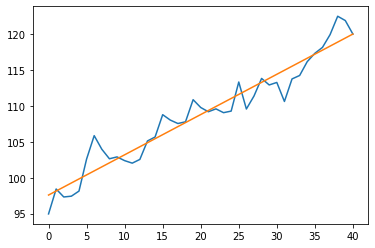

In [168]:
print(len(NAZDAQ_names))
i = np.argmin(Var)           # the criteria for choosing a stock
#print(i)
model_parameters, residuals, rank, singular_values = np.linalg.lstsq(A, Stocks2[i], rcond=None)
Yh = np.dot(A, model_parameters)
plt.plot(np.transpose([(Stocks2[i]), Yh]))
print("Stock name: " + NAZDAQ_names[i])
#print(np.arctan(Angle[i])*57.2)


In [ ]:
Time = time.time()

print(len(Stocks))
Stocks2 = torch.tensor(())
NAZDAQ_names2 = []
Length = len(Stocks[0])
for i in range(len(Stocks)):
    if len(Stocks[i]) == Length:
        #Stocks2.append(Stocks[i])
        NAZDAQ_names2.append(NAZDAQ_names3[i])
        Stack = torch.tensor([Stocks[i]]).float()
        Stocks2 = torch.cat((Stocks2, Stack), 0)


Stocks_Flatten = Stocks2.detach().clone()
X     = torch.linspace(0,Length-1, steps=Length)
Mean  = torch.zeros(len(Stocks2))
Var   = torch.zeros(len(Stocks2))
Gain  = torch.zeros(len(Stocks2))
Angle = torch.zeros(len(Stocks2))
Residu= torch.zeros(len(Stocks2))

loss = torch.nn.MSELoss()
#all_color_aug = torch.cat([inputs[("color_aug", i, 0)] for i in self.opt.frame_ids])
#inputs[(n, im, i)] = self.to_tensor(f)


for i in range(Stocks2.shape[0]):
    Stocks_Flatten.data[i] = (Stocks2.data[i]/torch.max(Stocks2.data[i]))*100
    #Gain[i] = Stocks2[i][Length-1] - Stocks2[i][0]
    #Coeffs = X*Gain[i]/(Length -1 + 0.00001)
    #Stocks_Flatten[i] = Stocks2[i]-Coeffs
    Stocks_Flatten.data[i] = (Stocks_Flatten[i]-torch.min(Stocks_Flatten.data[i]))
    Stocks_Flatten.data[i] = 100*Stocks_Flatten.data[i]/(torch.max(Stocks_Flatten.data[i]))
    Gain[i] = Stocks_Flatten[i][Length-1] - Stocks_Flatten[i][0]
    Coeffs = (X*Gain[i])/(Length -1 + 0.00001)
    Stocks_Flatten[i] = Stocks_Flatten[i]-Coeffs
    Var[i] = torch.var(Stocks_Flatten[i])   
    Mean[i] = torch.mean(Stocks_Flatten[i])    

    
    A = torch.vstack((X, torch.ones(Length)))
    A = torch.transpose(A, 0, 1)
    #model_parameters, residuals, rank, singular_values = np.linalg.lstsq(A, Stocks2[i], rcond=None)
    R, _ = torch.lstsq(Stocks2[i], A)
    R = R[0:A.size(1)]   # in case of a 1D tensor, the R[0] is m (slop), and R[1] is c (bias)
    #m, c = np.linalg.lstsq(A, Stocks2[i], rcond=None)[0]
    Yh = torch.squeeze(A.mm(R))
    #plt.plot(torch.transpose((torch.vstack((Stocks2[i], Yh))), 0, 1))
    Angle[i] = R[0]
    Residu[i] = loss(Yh, Stocks2[i])
    
print(time.time()-Time)

In [ ]:
Threshold_above = torch.ones(1)*Threshold_above
Threshold_below = torch.ones(1)*Threshold_below
Gainer_indexes  = torch.logical_and(Angle > Threshold_above, Angle < Threshold_below)
Gainer_indexes = torch.squeeze(Gainer_indexes.nonzero())
print(len(Gainer_indexes))
#torch.tensor(torch.where((Threshold_below>Angle).nonzero(as_tuple=False)[0]))
Gain  = Gain[Gainer_indexes]
Angle = Angle[Gainer_indexes]
Residu= Residu[Gainer_indexes]
Var   = Var[Gainer_indexes]
Stocks_Flatten = Stocks_Flatten[Gainer_indexes]
Stocks2 = Stocks2[Gainer_indexes]
NAZDAQ_names = []
for i in Gainer_indexes:
  NAZDAQ_names.append(NAZDAQ_names2[i])

572
torch.Size([41, 2])
torch.Size([41])
Stock name: JCOM j2 Global Inc Stock



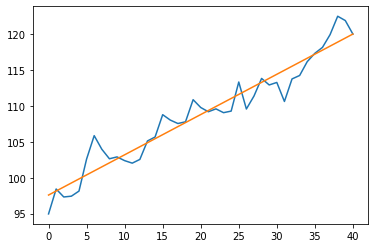

In [180]:
print(len(NAZDAQ_names))
i = np.argmin(Var)           # the criteria for choosing a stock
#print(i)
#R, _ = torch.lstsq(Stocks2[i], A)
print(A.shape)
print(Stocks2[i].shape)
R, _ = torch.lstsq(Stocks2[i], A)
R = R[0:A.size(1)]   # in case of a 1D tensor, the R[0] is m (slop), and R[1] is c (bias)
#m, c = np.linalg.lstsq(A, Stocks2[i], rcond=None)[0]
Yh = torch.squeeze(A.mm(R))
plt.plot(torch.transpose((torch.vstack((Stocks2[i], Yh))), 0, 1))
print("Stock name: " + NAZDAQ_names[i])
#print(np.arctan(Angle[i])*57.2)
